
# sat - 6-23-2018

# ch 3 linear regresion

In [12]:
%matplotlib inline

In [1]:

import pandas as pd
import numpy as np

pd.options.display.max_rows = 10

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

credit = pd.read_csv('./data/Credit.csv')

credit = credit.iloc[:,1:]

In [2]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:


#####################
# p 84,
# table 3.7
# male / female indicator variable

credit = pd.concat([credit,
           pd.get_dummies(credit['Gender'])],axis=1)


credit.groupby('Gender').mean()

X = credit.loc[:,['Female']]
y = credit['Balance']

X = sm.add_constant(X)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Sat, 23 Jun 2018   Prob (F-statistic):              0.669
Time:                        13:03:10   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.0

In [7]:


### or another way to incorporate categorical variables

import statsmodels.formula.api as smf

df = credit.copy()
df
model = smf.ols("Balance ~ C(Gender)", data=df).fit()

model.summary()

model = smf.ols("Income ~ C(Gender)", data=df).fit().summary()

###############################################################

# multiple categories

smf.ols("Balance ~ C(Ethnicity)", data=df).fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Sat, 23 Jun 2018   Prob (F-statistic):              0.957
Time:                        13:03:41   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   531.0000     46.319     11.464      0.000     439.939     622.061
C(Ethnicity)[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
C(Ethnicity)[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:

###############################################################
# 3.3.2 extenstions of the linear model
###############################################################

advertising = pd.read_csv('./data/Advertising.csv')
advertising = advertising.iloc[:,1:]

df = advertising.copy()

smf.ols('Sales ~ TV + Radio', data=df).fit().summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 23 Jun 2018   Prob (F-statistic):           4.83e-98
Time:                        13:04:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:

# adding interactions

smf.ols('Sales ~ Radio * TV', data=df).fit().summary()

# adding interactions among categorical / non-categorical variables

df_credit = credit.copy()


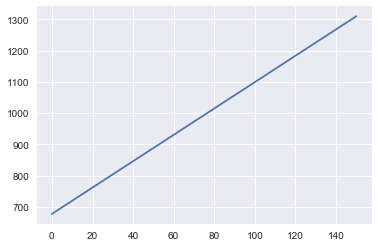

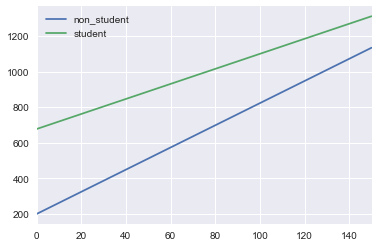

In [13]:

smf.ols('Balance ~ Income + C(Student)', data=df_credit).fit().summary()


model = smf.ols('Balance ~ Income + C(Student) + Income * C(Student)', data=df_credit).fit()

model.summary()
#model.coef_

model.params

income = np.arange(0,151)

line_student = model.params[0] + model.params[1] + (model.params[2]+model.params[3])*income

line_non_student = model.params[0] + (model.params[2])*income

student_vs_non_student = pd.DataFrame({'student':line_student,
              'non_student':line_non_student})

plt.plot(line_student)

########## p 90, figure 3.7

student_vs_non_student.plot()